<a href="https://colab.research.google.com/github/xantabdoc/H8_PYTNONL_062/blob/main/assignment/PYTN_ASSIGN_3_062_RUBEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import random
import warnings
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import pydotplus
import sklearn.tree as tree

In [ ]:
from google.colab import drive
from six import StringIO
from IPython.display import Image
from sklearn import metrics,svm
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/Dataset

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Dataset


In [ ]:
# Load Bank Additional Full CSV data to Dataframe
bank_additional_full_df = pd.read_csv('bank-additional/bank-additional-full.csv',sep = ";")
# print 5 first data and 5 last data for scanning unrelated or dirty data type
bank_additional_full_df.head(5).append(bank_additional_full_df.tail(5))




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# Load Bank Additional CSV data to Dataframe  

In [ ]:
bank_additional_df = pd.read_csv('bank-additional/bank-additional.csv',sep = ";")
bank_additional_df.head(5).append(bank_additional_df.tail(5))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


# Load Bank Full CSV data to Dataframe   

In [ ]:
bank_full_df = pd.read_csv('bank/bank-full.csv',sep = ";")
bank_full_df.head(5).append(bank_full_df.tail(5))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Load Bank Additional CSV data to Dataframe     

In [ ]:
bank_df = pd.read_csv('bank/bank.csv',sep = ";")
bank_df.head(5).append(bank_df.tail(5))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


# Basic cleaning  untuk model ***`Bank Additional Data Full`***

In [ ]:
bank_additional_full_df = bank_additional_full_df.dropna()
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Basic cleaning untuk model ***`Bank Additional Data`***

---



In [ ]:
bank_additional_df = bank_additional_df.dropna()
bank_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Standaring Column Name

In [ ]:
bank_additional_full_df.drop(columns={"contact","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m"},axis=1,inplace=True)

In [ ]:
print(bank_additional_full_df["month"].drop_duplicates())

0        may
7763     jun
12137    jul
18822    aug
23997    oct
24064    nov
27680    dec
27690    mar
27972    apr
37887    sep
Name: month, dtype: object


In [ ]:
bank_additional_full_df["month"].replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},inplace=True)
bank_additional_df["month"].replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},inplace=True)

In [ ]:
print(bank_additional_full_df["day_of_week"].drop_duplicates())

0       mon
360     tue
756     wed
1146    thu
1579    fri
Name: day_of_week, dtype: object


In [ ]:
bank_additional_full_df["day_of_week"].replace({"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7},inplace=True)
bank_additional_df["day_of_week"].replace({"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7},inplace=True)

In [ ]:
bank_additional_full_df["y"].replace({"yes":1,"no":2},inplace=True)
bank_additional_df["y"].replace({"yes":1,"no":2},inplace=True)

In [ ]:
bank_additional_full_df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
bank_additional_full_df["education"]=np.where(bank_additional_full_df["education"]=="basic.9y","basic",bank_additional_full_df["education"])
bank_additional_full_df["education"]=np.where(bank_additional_full_df["education"]=="basic.4y","basic",bank_additional_full_df["education"])
bank_additional_full_df["education"]=np.where(bank_additional_full_df["education"]=="basic.6y","basic",bank_additional_full_df["education"])


bank_additional_df["education"]=np.where(bank_additional_df["education"]=="basic.9y","basic",bank_additional_df["education"])
bank_additional_df["education"]=np.where(bank_additional_df["education"]=="basic.9y","basic",bank_additional_df["education"])
bank_additional_df["education"]=np.where(bank_additional_df["education"]=="basic.9y","basic",bank_additional_df["education"])

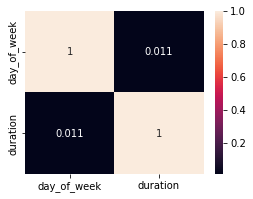

In [ ]:
bank_additional_full_df_correlation = bank_additional_full_df.drop(columns={"age","job","marital","education","default","housing","loan","month","campaign","poutcome","nr.employed"})
bank_additional_full_df_correlation = bank_additional_full_df_correlation.corr()
figure,ax = plt.subplots(figsize=(4,3))
ax = sns.heatmap(bank_additional_full_df_correlation,annot=True)

In [ ]:
bank_additional_full_df.drop(columns="duration",inplace=True)
bank_additional_df.drop(columns="duration",inplace=True)

# Exploration

In [ ]:
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   default      41188 non-null  object 
 5   housing      41188 non-null  object 
 6   loan         41188 non-null  object 
 7   month        41188 non-null  int64  
 8   day_of_week  41188 non-null  int64  
 9   campaign     41188 non-null  int64  
 10  poutcome     41188 non-null  object 
 11  nr.employed  41188 non-null  float64
 12  y            41188 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 4.4+ MB


In [ ]:
bank_additional_full_df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
bank_additional_full_df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
bank_additional_full_df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
bank_additional_full_df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
bank_additional_full_df["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
bank_additional_full_df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
bank_additional_full_df["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
bank_additional_full_df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Change the label with label encoder

In [ ]:
bank_additional_full_df["job"] = LabelEncoder().fit_transform(bank_additional_full_df["job"])
bank_additional_full_df["marital"] = LabelEncoder().fit_transform(bank_additional_full_df["marital"])
bank_additional_full_df["education"] = LabelEncoder().fit_transform(bank_additional_full_df["education"])
bank_additional_full_df["default"] = LabelEncoder().fit_transform(bank_additional_full_df["default"])
bank_additional_full_df["housing"] = LabelEncoder().fit_transform(bank_additional_full_df["housing"])
bank_additional_full_df["loan"] = LabelEncoder().fit_transform(bank_additional_full_df["loan"])
bank_additional_full_df["poutcome"] = LabelEncoder().fit_transform(bank_additional_full_df["poutcome"])
bank_additional_full_df["y"] = LabelEncoder().fit_transform(bank_additional_full_df["y"])

# Testing

In [ ]:
x = bank_additional_full_df.loc[:, bank_additional_full_df.columns != "y"]
y = bank_additional_full_df.loc[:, bank_additional_full_df.columns == "y"]
trdx,tedx,trdy,tedy = train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
scaler = StandardScaler()
trdx = scaler.fit_transform(trdx)
tedx = scaler.fit_transform(tedx)
copy_trdx = trdx
copy_tedx = tedx
copy_trdy = trdy
copy_tedy = tedy

# Using Logistic Regression

In [ ]:
lr = sma.Logit(trdy,trdx)
stats_regression=lr.fit()
print(stats_regression.summary())
mr = LogisticRegression(solver="liblinear",C=0.05, multi_class="ovr",random_state=0)
mr.fit(trdx,trdy)
print("data train score: \t",mr.score(trdx,trdy))
print("data test score: \t",mr.score(tedx,tedy))
ypr = mr.predict(tedx)
print("data test accuration: \t",metrics.accuracy_score(tedy,ypr))

Optimization terminated successfully.
         Current function value: 0.658191
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                30891
Model:                          Logit   Df Residuals:                    30879
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                 -0.8715
Time:                        06:55:17   Log-Likelihood:                -20332.
converged:                       True   LL-Null:                       -10864.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0475      0.013      3.537      0.000       0.021       0.074
x2             0.0143      0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Using K-Neares Neighbor

In [ ]:
knnm = KNeighborsClassifier(n_neighbors=12)
knnm.fit(trdx,trdy)
kneares_neigbor_predict_y = knnm.predict(tedx)
print("model accuracy on knn prediction is: \t",metrics.accuracy_score(tedy,kneares_neigbor_predict_y))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model accuracy on knn prediction is: 	 0.8953093133922502


# Using Support Vector Machine (SVM)

In [ ]:
svmm = svm.SVC(kernel="linear")
svmm.fit(trdx,trdy)
svm_predict_y = svmm.predict(tedx)
print("model accuracy on svm prediction is: \t",metrics.accuracy_score(tedy,svm_predict_y))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model accuracy on svm prediction is: 	 0.8868602505584151


# Using Decission Tree

model accuracy on decission tree prediction is: 	

 0.8986112459939788


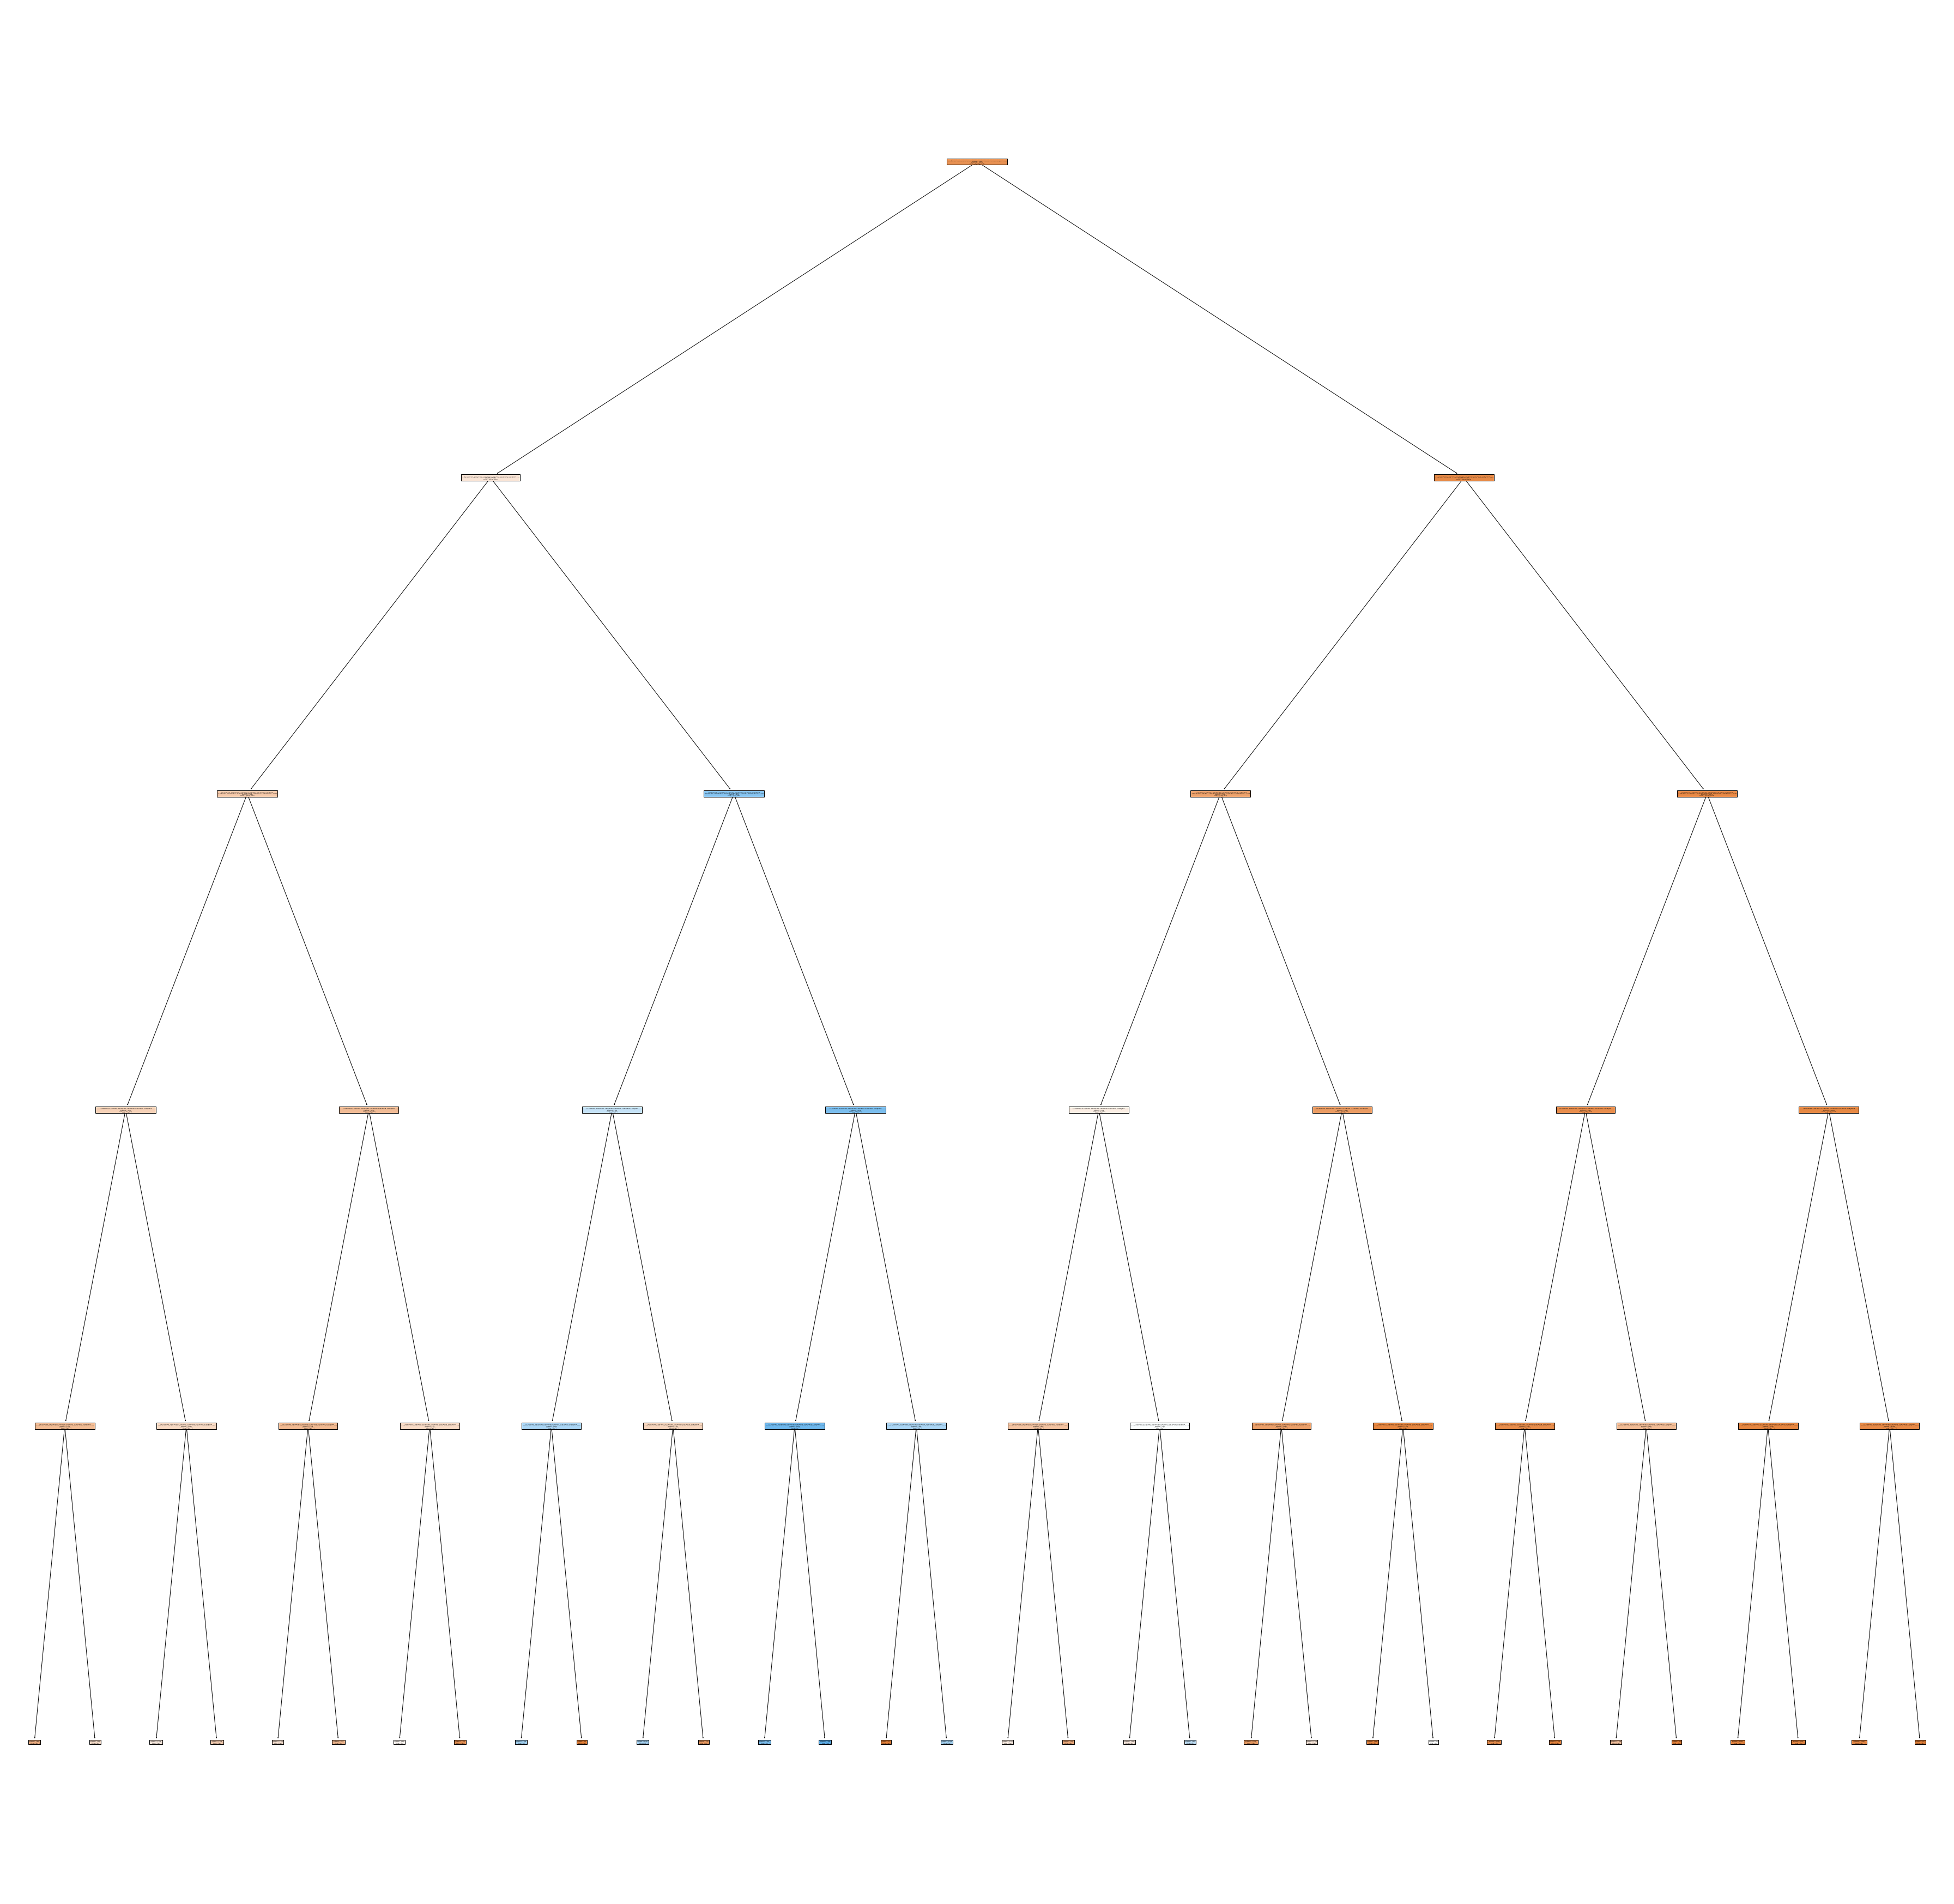

In [ ]:
treem = DecisionTreeClassifier(random_state=1, criterion="entropy", max_depth = 5)
treem = treem.fit(trdx,trdy)
decission_tree_predict_y = treem.predict(tedx)
print("model accuracy on decission tree prediction is: \t\n\n",metrics.accuracy_score(tedy,decission_tree_predict_y))
figure = plt.figure(figsize=(64,64))
_ = tree.plot_tree(treem,feature_names=(trdx),class_names=["yes","no"],filled=True)




# Using Random Forest

In [ ]:
rfm = RandomForestClassifier(n_estimators=100)
rfm.fit(trdx,trdy)
random_forest_predict_y = rfm.predict(tedx)
print("model accuracy on random forest prediction is: \t",metrics.accuracy_score(tedy,random_forest_predict_y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


model accuracy on random forest prediction is: 	 0.8933670000971157


# Using Naive Bayes

In [ ]:
nbm = GaussianNB()
nbm.fit(trdx,trdy)
naive_bayes_predict_y = nbm.predict(tedx)
print("model accuracy on naive bayes prediction is: \t",metrics.accuracy_score(tedy,naive_bayes_predict_y))

model accuracy on naive bayes prediction is: 	 0.8396620374866466


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Using Confusion Matrix

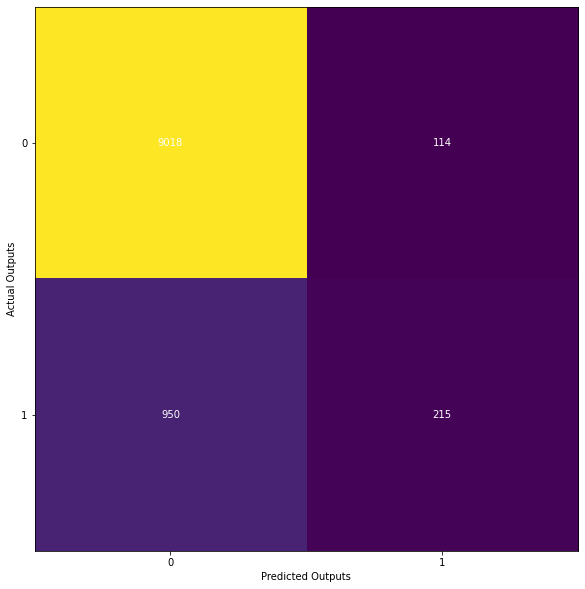

In [ ]:
cmm = confusion_matrix(tedy,ypr)
figure,ax = plt.subplots(figsize=(10,10))
ax.imshow(cmm)
ax.grid(False)
ax.set_xlabel("Predicted Outputs",color="black")
ax.set_ylabel("Actual Outputs",color="black")
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5,-0.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i,cmm[i,j],ha="center",va="center",color="white")

plt.show()

# Summary 

In [ ]:
print("model accuracy on Logistics: \t\t\t\t",metrics.accuracy_score(tedy,ypr))
print("model accuracy on knn prediction is: \t\t\t",metrics.accuracy_score(tedy,kneares_neigbor_predict_y))
print("model accuracy on svm prediction is: \t\t\t",metrics.accuracy_score(tedy,svm_predict_y))
print("model accuracy on decission tree prediction is: \t",metrics.accuracy_score(tedy,decission_tree_predict_y))
print("model accuracy on random forest prediction is: \t\t",metrics.accuracy_score(tedy,random_forest_predict_y))
print("model accuracy on naive bayes prediction is: \t\t",metrics.accuracy_score(tedy,naive_bayes_predict_y))

model accuracy on Logistics: 				 0.8966689326988443
model accuracy on knn prediction is: 			 0.8953093133922502
model accuracy on svm prediction is: 			 0.8868602505584151
model accuracy on decission tree prediction is: 	 0.8986112459939788
model accuracy on random forest prediction is: 		 0.8933670000971157
model accuracy on naive bayes prediction is: 		 0.8396620374866466


# From Accuacy Summary the best model for data training is Logistic because Logistic get **the** biggest accuracy